In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df  = pd.read_csv("test.csv")

In [3]:
df.head()

,Business,Competition,Value,Profit
0,Freelancing,Low,Medium,Yes
1,E-commerce,Medium,Low,Yes
2,E-commerce,High,High,No
3,Business,Low,High,Yes
4,e-commerce,High,High,Yes


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import plot_tree

In [10]:
# Convert categorical variables to numerical labels
label_encoder = LabelEncoder()

df["Business"] = label_encoder.fit_transform(df["Business"])
df["Competition"] = label_encoder.fit_transform(df["Competition"])
df["Profit"] = label_encoder.fit_transform(df["Profit"])
df["Value"] = label_encoder.fit_transform(df["Value"])

In [11]:
# Split the data into features (X) and target (y)
X = df.drop("Profit",axis=1)
y = df['Profit']

In [12]:
X.head()

,Business,Competition,Value
0,2,1,2
1,1,2,1
2,1,0,0
3,0,1,0
4,3,0,0


In [13]:
y.head()

0    1
1    1
2    0
3    1
4    1
Name: Profit, dtype: int64

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [15]:
# Create a decision tree classifier
dtc = DecisionTreeClassifier(random_state=42)

In [16]:
# Fit the classifier to the training data
dtc.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

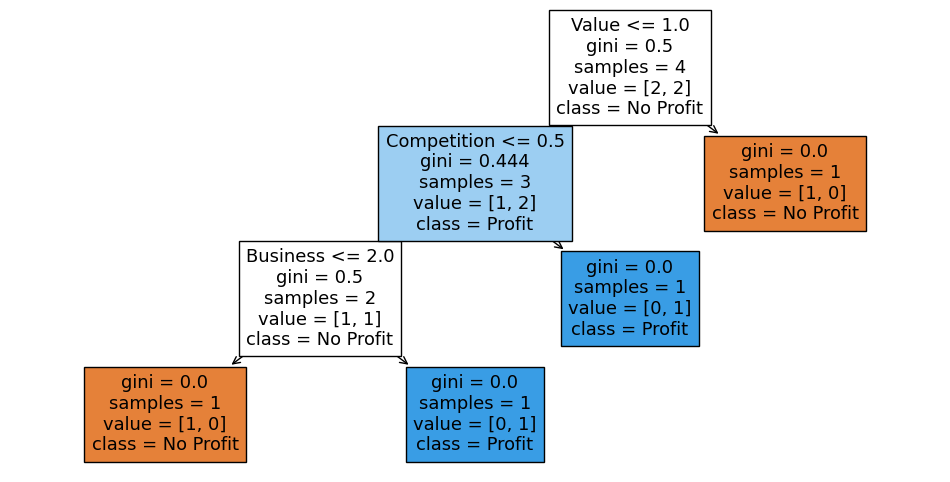

In [22]:
# Visualize the decision tree
plt.figure(figsize=(12, 6))
plot_tree(dtc, feature_names=X.columns, class_names=["No Profit", "Profit"], filled=True)
plt.show()

In [19]:
# Make predictions on the test data
y_pred = dtc.predict(X_test)

In [20]:
# Evaluate the accuracy of the model
accuracy = (y_pred == y_test).mean()
print("Accuracy:", accuracy)

Accuracy: 0.5


## MIN MAX SCALER

In [25]:
from sklearn.preprocessing import MinMaxScaler

In [35]:
dat = [450, 652, 236, 968, 465, 456, 963, 789, 741, 321, 852, 951]
data = np.array([450, 652, 236, 968, 465, 456, 963, 789, 741, 321, 852, 951]).reshape(-1, 1)

In [36]:
# Create a MinMaxScaler instance
scaler = MinMaxScaler()

In [37]:
# Fit and transform the data using the scaler
scaled_data = scaler.fit_transform(data)

In [39]:
print("Original Data:\n", data)
print("Scaled Data:\n", scaled_data)

Original Data:
 [[450]
 [652]
 [236]
 [968]
 [465]
 [456]
 [963]
 [789]
 [741]
 [321]
 [852]
 [951]]
Scaled Data:
 [[0.29234973]
 [0.56830601]
 [0.        ]
 [1.        ]
 [0.31284153]
 [0.30054645]
 [0.9931694 ]
 [0.75546448]
 [0.68989071]
 [0.11612022]
 [0.84153005]
 [0.97677596]]


## Z_Score

In [40]:
# Given dataset
data = [963, 321, 135, 852, 258, 456, 741, 951, 753, 665, 452, 520]

In [41]:
# Convert the data to a NumPy array
data = np.array(data)

In [42]:
mean_value = np.mean(data)
std_dev = np.std(data)

In [43]:
# Apply z-Score Scaling
scaled_data = (data - mean_value) / std_dev

print("Original Data:", data)
print("Scaled Data:", scaled_data)

Original Data: [963 321 135 852 258 456 741 951 753 665 452 520]
Scaled Data: [ 1.4270569  -1.02205122 -1.73160591  1.00361297 -1.26238426 -0.50705185
  0.58016904  1.38127918  0.62594677  0.29024347 -0.52231109 -0.262904  ]
